In [1]:
import hc_lib.plots.figlib as flib
flib.siteFG()
from figrid.figrid import DataList
from figrid.figrid import Figrid


In [2]:
box = 'tng100'
snap = [99, 67]
axis = 0
res = 800
files = ['hiptlXgalaxy', 'vnXgalaxy']
master = DataList()
for f in files:
    for s in snap:
        rlib = flib.load(box, s, axis, res, f)
        master.loadResults(rlib.results['pk'])


In [3]:
smfont = 10
larfont = 12

The row values for color: ['blue', 'red', 'resolved']
The column values for is_particle: [False]


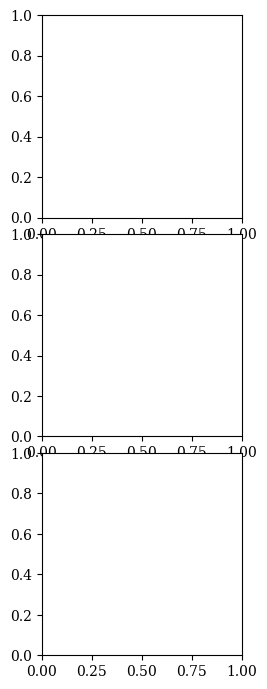

In [4]:
ip = {'snapshot':99}
dl = DataList(master.getMatching(ip))
fg = Figrid(dl)
fg.setColOrder(['blue', 'red', 'resolved'])
fg.arrange('color', 'is_particle', panel_length = 2)
pargs = {}
pargs['label'] = 'Redshift Space'
pargs['color'] = 'tan'
pargs['alpha'] = 0.55
fg.makeFills({'space':'real'}, pargs)
pargs['label'] = 'Real Space'
pargs['color'] = 'gray'
fg.makeFills({'space':'redshift'}, pargs)

In [5]:
box = dl.getAttrVals('box')[0]
res = dl.getAttrVals('grid_resolution')[0]

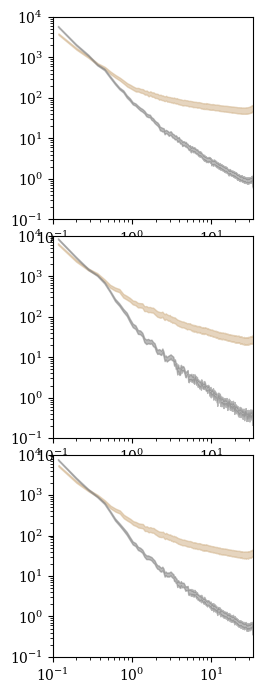

In [6]:
fg.plot()

# fix the axes
flib.logAxes(fg)
flib.setNyq(fg, .1, res, box)
axparams = {'ylim':[0.1, 1e4]}
fg.setAxisParams(axparams)
fg.fig

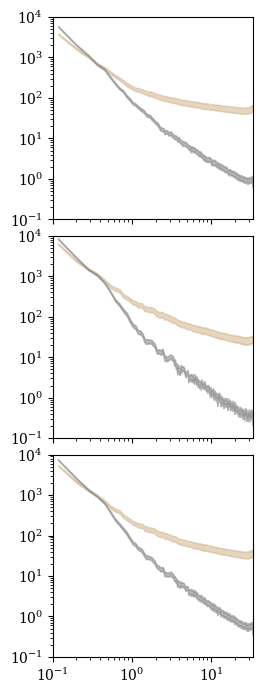

In [7]:
# fix the tick labels
fg.setDefaultTicksParams()
fg.setTicks({'labelsize':smfont})
fg.fig

In [8]:
# labels
kw = {'fontsize':larfont}
flib.pklabels(fg, ysub = r'\rm{opt}', xtxtkw = kw, ytxtkw = kw)
txtkw = {}
txtkw['ha'] = 'center'
txtkw['va'] = 'top'
txtkw['fontsize'] = smfont
fg.setRowLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies'], [0.5, 0.95],
               txtkw)
fg.drawLegend({'frameon':False, 'fontsize':smfont}, (0,0))



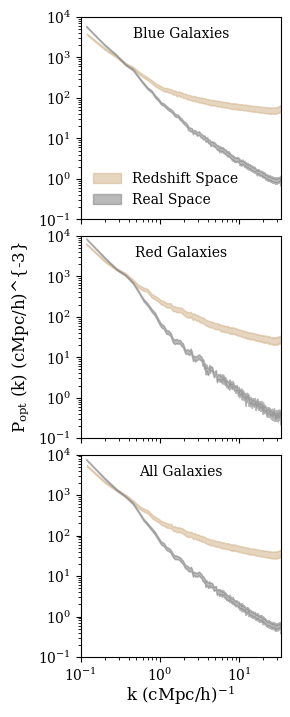

In [9]:
fg.fig